<a href="https://colab.research.google.com/github/hardik1408/CS771/blob/hardik/emoticon_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## loading the files


In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the CSV files
train_df = pd.read_csv('/Users/namangupta/Desktop/771/mini-project-1/datasets/train/train_emoticon.csv')
validation_df = pd.read_csv('/Users/namangupta/Desktop/771/mini-project-1/datasets/valid/valid_emoticon.csv')

# Assuming the CSV files have 'emojis' and 'label' columns
train_texts = train_df['input_emoticon'].values
train_labels = train_df['label'].values

validation_texts = validation_df['input_emoticon'].values
validation_labels = validation_df['label'].values

### Observing data

In [2]:
total_train = []
for i in train_texts:
    total_train += i

emoji_freq = dict()
for i in total_train:
    if i in emoji_freq:
        emoji_freq[i] += 1
    else:
        emoji_freq[i] = 1

In [3]:
emoji_0_1 = dict()

for i in emoji_freq:
    emoji_0_1[i] = (0,0)

for i in emoji_freq:
    for j in range(len(train_texts)):
        if i in train_texts[j]:
            if train_labels[j] == 1:
                emoji_0_1[i] = (emoji_0_1[i][0], emoji_0_1[i][1]+1)
            else:
                emoji_0_1[i] = (emoji_0_1[i][0]+1, emoji_0_1[i][1])

emoji_0_1

mannnyyy = []
for i in emoji_0_1:
    if emoji_0_1[i] == (3576, 3504):
        mannnyyy.append(i)

mannnyyy

['😛', '🛐', '😑', '😣', '🙯', '🚼', '🙼']

We find that in every row these 7 emoticons appear!

In [4]:
ss0 = 0
ss1 = 1
snd = 0

for i in range(len(train_texts)):
    j = train_texts[i]
    for em in mannnyyy:
        if em in j:
            pass
        else:
            snd += 1
            break
    else:
        if train_labels[i] == 0:
            ss0 += 1
        else:
            ss1 += 1
    
ss0, ss1, snd


(3576, 3505, 0)

In [5]:
l1 = []
l0 = []

for i in range(len(train_texts)):
    s = []
    for idx in range(len(train_texts[i])):
        j = train_texts[i][idx]
        if j in mannnyyy:
            s.append((j, idx))

    if train_labels[i] == 1:
        l1.append(len(s))
    else:
        l0.append(len(s))

set(l1), set(l0)

({10}, {10})

Also, these 7 emoticons make up exactly 10/13 of every given string (Be it train or validation)

In [6]:
train_texts_mod = []

for i in train_texts:
    s = ''
    for j in i:
        if j not in mannnyyy:
            s += j
    train_texts_mod.append(s)

train_texts_mod = np.array(train_texts_mod, dtype=object)

In [7]:
validation_texts_mod = []

for i in validation_texts:
    s = ''
    for j in i:
        if j not in mannnyyy:
            s += j
    validation_texts_mod.append(s)

validation_texts_mod = np.array(validation_texts_mod, dtype=object)

We now use 'train_text_mod' and 'validation_text_mod' -> which are just a 3 length string for every element (rather than 13)

## preprocessing on input

In [8]:
#  Tokenize and pad the emoji sequences
tokenizer = Tokenizer(char_level=True)  # Tokenizing each emoji as a character
tokenizer.fit_on_texts(train_texts)  # Fit only on training data

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts_mod)
validation_sequences = tokenizer.texts_to_sequences(validation_texts_mod)

# Pad the sequences to the same length
max_len = max([len(seq) for seq in train_sequences])  # Maximum sequence length in train data
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_len, padding='post')

# Convert labels into numeric format if they are not (if necessary)
train_labels = train_labels.astype(int)
validation_labels = validation_labels.astype(int)

## dividing data for the task

In [9]:
x_train_100 = train_padded
y_train_100 = train_labels
# prompt: take only 80% of the training dataset

train_size_80 = int(len(x_train_100) * 0.8)
x_train_80 = x_train_100[:train_size_80]
y_train_80 = y_train_100[:train_size_80]
# prompt: take only 60% of training data

# Shuffle the indices of the training data
indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_60_random = int(len(x_train_100) * 0.6)

# Select the shuffled indices for the 60% split
x_train_60 = x_train_100[indices[:train_size_60_random]]
y_train_60 = y_train_100[indices[:train_size_60_random]]

indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_40_random = int(len(x_train_100) * 0.4)

# Select the shuffled indices for the 60% split
x_train_40 = x_train_100[indices[:train_size_40_random]]
y_train_40 = y_train_100[indices[:train_size_40_random]]

indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_20_random = int(len(x_train_100) * 0.2)

# Select the shuffled indices for the 60% split
x_train_20 = x_train_100[indices[:train_size_20_random]]
y_train_20 = y_train_100[indices[:train_size_20_random]]



### model


In [10]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 100%

In [11]:
model.fit(x_train_100, y_train_100, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5500 - loss: 0.6783 - val_accuracy: 0.8589 - val_loss: 0.5611
Epoch 2/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3561 - val_accuracy: 0.9018 - val_loss: 0.2921
Epoch 3/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8837 - loss: 0.2822 - val_accuracy: 0.9305 - val_loss: 0.1893
Epoch 4/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9023 - loss: 0.2323 - val_accuracy: 0.9427 - val_loss: 0.1392
Epoch 5/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.2214 - val_accuracy: 0.9489 - val_loss: 0.1499
Epoch 6/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2022 - val_accuracy: 0.9468 - val_loss: 0.1314
Epoch 7/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2047 - val_accuracy: 0.9325 - val_loss: 0.1659
Epoch 8/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9199 - loss: 0.1879 - val_accuracy: 0.

In [12]:
# Print the model summary for reference
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 3, 8)           │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 3, 16)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,173 (86.62 KB)

 Trainable params: 7,369 (28.79 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 14,740 (57.58 KB)

### 80%

In [13]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train_80, y_train_80, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5226 - loss: 0.6925 - val_accuracy: 0.4847 - val_loss: 0.6893
Epoch 2/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.5079 - val_accuracy: 0.8793 - val_loss: 0.4545
Epoch 3/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3329 - val_accuracy: 0.9018 - val_loss: 0.2931
Epoch 4/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8906 - loss: 0.2877 - val_accuracy: 0.8814 - val_loss: 0.2563
Epoch 5/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8970 - loss: 0.2701 - val_accuracy: 0.9346 - val_loss: 0.1883
Epoch 6/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9008 - loss: 0.2652 - val_accuracy: 0.9264 - val_loss: 0.1754
Epoch 7/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.2490 - val_accuracy: 0.9080 - val_loss: 0.1860
Epoch 8/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.2450 - val_accuracy: 0.

### 60%

In [15]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train_60, y_train_60, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5093 - loss: 0.6936 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 2/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.6696 - val_accuracy: 0.8262 - val_loss: 0.6004
Epoch 3/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3761 - val_accuracy: 0.8548 - val_loss: 0.4086
Epoch 4/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.2954 - val_accuracy: 0.9182 - val_loss: 0.2651
Epoch 5/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.2543 - val_accuracy: 0.9162 - val_loss: 0.2100
Epoch 6/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.2530 - val_accuracy: 0.9182 - val_loss: 0.1873
Epoch 7/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.2323 - val_accuracy: 0.9407 - val_loss: 0.1432
Epoch 8/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9178 - loss: 0.2005 - val_accuracy: 0.

### 40%

In [17]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x_train_40, y_train_40, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4916 - loss: 0.6943 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5953 - loss: 0.6802 - val_accuracy: 0.6196 - val_loss: 0.6793
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.5152 - val_accuracy: 0.8262 - val_loss: 0.5495
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3369 - val_accuracy: 0.8773 - val_loss: 0.4351
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.2963 - val_accuracy: 0.8569 - val_loss: 0.3528
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.2659 - val_accuracy: 0.9039 - val_loss: 0.2531
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8940 - loss: 0.2580 - val_accuracy: 0.9223 - val_loss: 0.2176
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8929 - loss: 0.2601 - val_accuracy: 0.9223 - val_loss:

### 20%

In [19]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x_train_20, y_train_20, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5453 - loss: 0.6898 - val_accuracy: 0.5153 - val_loss: 0.6927
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 0.6875 - val_accuracy: 0.5542 - val_loss: 0.6928
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.6696 - val_accuracy: 0.4888 - val_loss: 0.6932
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.6198 - val_accuracy: 0.5481 - val_loss: 0.6860
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7541 - loss: 0.5328 - val_accuracy: 0.6953 - val_loss: 0.6441
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3898 - val_accuracy: 0.8016 - val_loss: 0.5564
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.3071 - val_accuracy: 0.8262 - val_loss: 0.4944
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2614 - val_accuracy: 0.8425 - val_loss: 0.4378
Epo

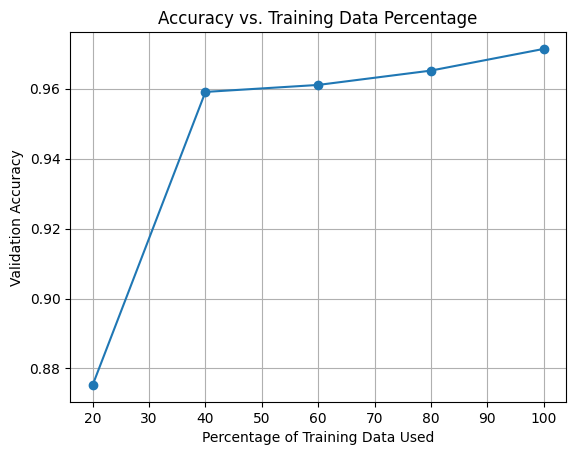

In [26]:
# prompt: create a plot which plots the accuracy vs the percentage of training data used

import matplotlib.pyplot as plt

# Assuming you have the accuracy values for each training data percentage stored in a list
training_data_percentages = [20, 40, 60, 80, 100]
accuracies = [0.8753, 0.9591, 0.9611, 0.9652, 0.9714]  # Replace with your actual accuracy values


# Create the plot
plt.plot(training_data_percentages, accuracies, marker='o')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs. Training Data Percentage')
plt.grid(True)
plt.show()


In [27]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))  # Embedding layer
model.add(LSTM(16))  # LSTM layer with 16 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
# Train the model using the training data and validate on the validation set
model.fit(train_padded, train_labels, epochs=30, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)
print(f'Validation Accuracy: {accuracy}')


Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5234 - loss: 0.6903 - val_accuracy: 0.8282 - val_loss: 0.5364
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8592 - loss: 0.4093 - val_accuracy: 0.9530 - val_loss: 0.1810
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9562 - loss: 0.1606 - val_accuracy: 0.9468 - val_loss: 0.1258
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9688 - loss: 0.1094 - val_accuracy: 0.9611 - val_loss: 0.1005
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9711 - loss: 0.0924 - val_accuracy: 0.9632 - val_loss: 0.0873
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9771 - loss: 0.0724 - val_accuracy: 0.9734 - val_loss: 0.0764
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9852 - loss: 0.0589 - val_accuracy: 0.9734 - val_loss: 0.0679
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9876 - loss: 0.0493 - va

In [29]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 3, 8)           │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,013 (39.12 KB)

 Trainable params: 3,337 (13.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,676 (26.08 KB)

In [37]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:

# Train the model using the train set and validate on the validation set
model.fit(train_padded, train_labels, epochs=25, batch_size=16, validation_data=(validation_padded, validation_labels))

Epoch 1/25


443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5361 - loss: 0.6747 - val_accuracy: 0.8589 - val_loss: 0.4083
Epoch 2/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.3557 - val_accuracy: 0.9039 - val_loss: 0.2126
Epoch 3/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.2893 - val_accuracy: 0.9284 - val_loss: 0.1528
Epoch 4/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8963 - loss: 0.2604 - val_accuracy: 0.9448 - val_loss: 0.1494
Epoch 5/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8976 - loss: 0.2548 - val_accuracy: 0.9346 - val_loss: 0.1449
Epoch 6/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8986 - loss: 0.2525 - val_accuracy: 0.9407 - val_loss: 0.1391
Epoch 7/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9014 - loss: 0.2307 - val_accuracy: 0.9468 - val_loss: 0.1520
Epoch 8/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.2193 - val_accuracy: 0.9509 - val_

In [39]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 3, 8)           │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_20                │ (None, 3, 16)          │         1,088 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 3, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (None, 32)             │         4,224 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,173 (86.62 KB)

 Trainable params: 7,369 (28.79 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 14,740 (57.58 KB)

In [40]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9689 - loss: 0.0762
Validation Accuracy: 0.9734
